**Topic** :  Video Game Sales Performance Analysis
Goals


To analyze video game sales performance and trends across different consoles, publishers, genres, and regions to understand what factors contribute to higher global sales.

Dataset columns and description.


title        : Game title

console      : Console the game was released for

genre	     : Genre of the game

publisher	 : Publisher of the game

developer	 : Developer of the game

critic_score :	Metacritic score (out of 10)

total_sales	 : Global sales of copies in millions

na_sales	 : North American sales of copies in millions

jp_sales	 : Japanese sales of copies in millions

pal_sales	 : European & African sales of copies in millions

other_sales  : Rest of world sales of copies in millions

release_date : Date the game was released on

last_update	 : Date the data was last updated


---
Tasks & goals
---
1️. Sales Analysis

Find top-selling games globally and regionally.


Compare sales performance between regions.(bar chart)

Identify which console/platform contributes most to total sales.

Check which publishers or developers dominate global sales.

Analyze genre popularity (e.g., Action vs. Shooter vs. Adventure).

Which console has the highest total sales?

Which genre performs best globally?

How do Japanese sales compare to North American sales for top games?


---


2️. Critic Score Impact

Analyze correlation between critic_score and total_sales.


Which publishers/developers consistently make highly rated games?
Is there a strong relationship between critic score and sales?


---


3.Time-Based Trends
Study sales over time — which years saw the most blockbuster releases?


Track sales across years.


Region wise slaes analysis by year.

---

4️. Regional Insights

Analyze regional preferences — e.g., Japanese players vs. Western players.


Determine which genres or publishers are most successful in each region.

---


5️. Publisher / Developer Performance

Compare average sales per game per publisher.


Find the most profitable publishers globally.


Identify developer-publisher partnerships that yield top results.


Which developer has the highest average critic score?


Which publisher’s games perform best in Europe?

---

6️. Platform Evolution

Compare top 10 sales performance of the same game across platforms.


Evaluate console lifecycle — which platforms dominate certain years.


How do sales of the same title differ across platforms?


Which consoles have the longest-lasting sales trends?


Correlation matrix of sales and critic_score by region.

---
**Final Deliverables**


Exploratory Data Analysis (EDA) report or dashboard.


Insights summary with visualizations:


Top 10 best-selling games.


Top publishers by total global sales.


Sales distribution by genre.


Correlation heatmap (critic_score vs. sales).


Yearly sales trend graph.




In [ ]:
pip install pandas selenium webdriver_manager

In [ ]:
""" Scraping the websitr for data"""

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager # Optional, for automatic driver management
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options
import csv, re
from datetime import datetime
# Initialize Chrome WebDriver (using webdriver_manager for convenience)
service = Service(ChromeDriverManager().install())

options = Options()
options.add_argument("--headless=new")
options.add_argument("--disable-gpu")
options.add_argument("--blink-settings=imagesEnabled=false")  # don’t load images
options.add_argument("--disable-extensions")
options.add_argument("--disable-blink-features=AutomationControlled")

driver = webdriver.Chrome(service=service, options=options)


driver.get("https://www.vgchartz.com/games/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=50&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0&showpublisher=1&showvgchartzscore=0&showvgchartzscore=1&shownasales=0&shownasales=1&showdeveloper=0&showdeveloper=1&showcriticscore=0&showcriticscore=1&showpalsales=0&showpalsales=1&showreleasedate=0&showreleasedate=1&showuserscore=0&showuserscore=1&showjapansales=0&showjapansales=1&showlastupdate=0&showlastupdate=1&showothersales=0&showothersales=1&showshipped=0&showshipped=1")

element = driver.find_element(By.ID, "generalBody")

def convert_date(date_str):
    if not date_str or date_str.strip().upper() == "N/A":
        return ""  # or return "N/A" if you prefer keeping it visible

    # remove suffix like st, nd, rd, th (e.g., "01st" → "01")
    date_str = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str.strip())

    try:
        # parse format like "27 Feb 20"
        dt = datetime.strptime(date_str, "%d %b %y")
        return dt.strftime("%#d/%#m/%Y")  # Windows format
    except Exception as e:
        print("Error parsing date:", date_str, e)
        return date_str


with open('vgsales.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow([
        "Rank","img", "Name", "Platform", "Publisher", "Developer","VGChartz Score",
        "Critic_Score", "User_Score","Total Shipped", "Total_Sales",
        "NA_Sales", "PAL_Sales", "JP_Sales", "Other_Sales", "Release_Date", "Last Update"
    ])

while True:
    print("Scraping:", driver.current_url)

    try:
        general_body = driver.find_element(By.ID, "generalBody")
        table = general_body.find_element(By.TAG_NAME, "table")
        rows = table.find_elements(By.TAG_NAME, "tr")[1:]

    except NoSuchElementException:
        print("Table not found on page, skipping.")
        break
    with open('vgsales.csv', 'a', newline='', encoding='utf-8') as file:
        for row in rows:
            cols = [td.text.strip() for td in row.find_elements(By.TAG_NAME, "td")]
            if cols:
                cols[-1] = convert_date(cols[-1])
                cols[-2] = convert_date(cols[-2])
                writer = csv.writer(file)
                writer.writerow(cols)

    try:
        current_page = general_body.find_element(By.CSS_SELECTOR, "a.selected").text.strip()
        print("Current page:", current_page)
    except NoSuchElementException:
        print("No current page number found.")
        break

    try:

        pagination_links = general_body.find_elements(By.CSS_SELECTOR, "th span a")
        next_page = None

        for i, link in enumerate(pagination_links):
            if link.text.strip() == current_page:
                if i + 1 < len(pagination_links):
                    next_page = pagination_links[i + 1]
                break

        # If there’s no next page, break
        if not next_page or ">>" in next_page.text:
            print("Reached last page.")
            break

        driver.get(next_page.get_attribute("href"))

    except Exception as e:
        print("Pagination ended or error:", e)

driver.quit()


In [ ]:
import pandas as pd

# Load the CSV file
# Replace the path below with your file's actual path in Drive
file_path = '/content/drive/MyDrive/Main_project/Dataset/vgsales.csv'
df = pd.read_csv(file_path)

print(df.head())


                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

In [ ]:
import pandas as pd

df = pd.read_csv("dataset/vgsales.csv")


# removing unwanted columns
df.drop(['img', 'last_update'], axis=1, inplace=True)

df.rename(columns={'name': 'title'}, inplace=True)

# Fill with mean or median (numeric columns)
df["critic_score"].fillna(df["critic_score"].mean(), inplace=True)


# total_sales =	na_sales +	jp_sales + pal_sales +	other_sales
# so total_sales null columns filling with sum before that filling other columns with this relation

sales_cols = ["na_sales", "jp_sales", "pal_sales", "other_sales"]

for col in sales_cols:
    df[col] = df[col].replace(r'[^0-9.\-]', '', regex=True).astype(float)

df[sales_cols] = df[sales_cols].fillna(0)


df["total_sales"] = df["total_sales"].replace(r'[^0-9.\-]', '', regex=True).astype(float)
# Fill missing total_sales using sum of 4 columns
df["total_sales"] = df.apply(
    lambda row: row["total_sales"]
    if pd.notnull(row["total_sales"])
    else row[sales_cols].sum(),
    axis=1
)

# For each row, if exactly one sales col was missing (originally),
#     infer it as total_sales - sum(other_3)
for col in sales_cols:
    mask = (df[col] == 0) & (df[sales_cols].sum(axis=1) != df["total_sales"])
    df.loc[mask, col] = df["total_sales"] - (df[sales_cols].sum(axis=1) - df[col])

# Remove rows where everything is 0 (no sales data)
df = df[~((df[sales_cols + ["total_sales"]].sum(axis=1)) == 0)]


df.dropna(inplace=True)
print(df.isnull().sum())


#checking for duplicates

# Check duplicates
print("--- duplicates ----", df.duplicated().sum())

if df.duplicated().sum()>0:
    # Remove duplicates
    df.drop_duplicates(inplace=True)

#Formatting and Standardization

#Ensures data consistency — same format, type, and units.

# Convert data types
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
float_cols = ["critic_score",	"total_sales",	"na_sales",	"jp_sales",	"pal_sales", "other_sales"]


df[float_cols] = df[float_cols].astype(float)


str_cols = ["title","publisher","developer"]

df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())



df.to_csv('cleaned_data1.csv', index=False)



/tmp/ipython-input-5483232.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["critic_score"].fillna(df["critic_score"].mean(), inplace=True)


title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64
--- duplicates ---- 3


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Main_project/Dataset/cleaned_data.csv')

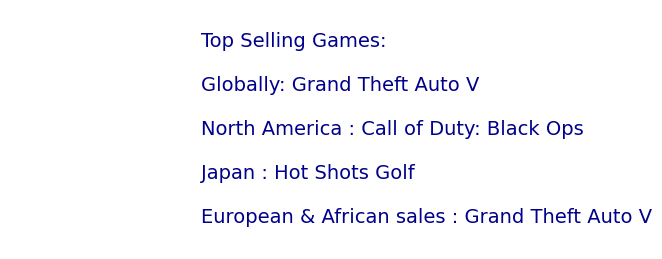

In [12]:
#Find top-selling games globally and regionally.

plt.figure(figsize=(4, 3))
plt.text(0.5, 0.5,
         f"""
            Top Selling Games: \n
            Globally: {df.loc[df['total_sales'].idxmax(), 'title']}\n
            North America : {df.loc[df['na_sales'].idxmax(), 'title']}\n
            Japan : {df.loc[df['jp_sales'].idxmax(), 'title']}\n
            European & African sales : {df.loc[df['pal_sales'].idxmax(), 'title']}
            """,
         ha='left', va='center', fontsize=14, color='darkblue')
plt.axis('off')
plt.show()


/tmp/ipython-input-1805417044.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_df, x='Region', y='Total_Sales', palette='viridis')


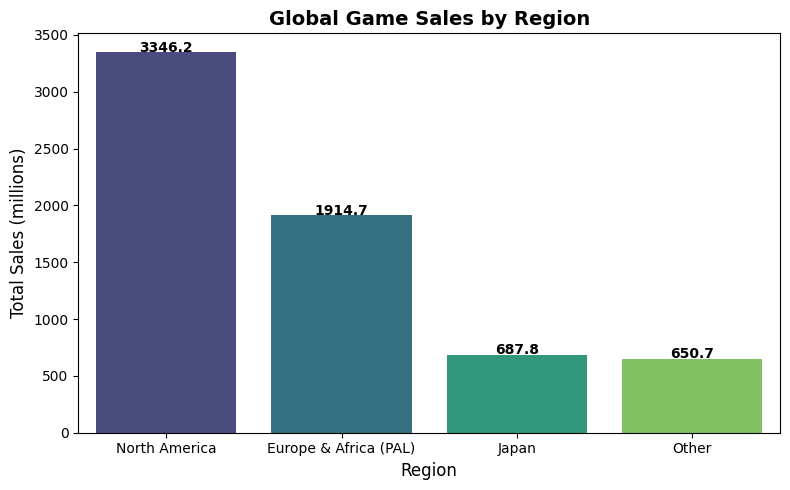

In [ ]:

#Compare sales performance between regions.
region_sales = {
    'North America': df['na_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'Europe & Africa (PAL)': df['pal_sales'].sum(),
    'Other': df['other_sales'].sum()
}

region_df = pd.DataFrame(list(region_sales.items()), columns=['Region', 'Total_Sales'])
region_df = region_df.sort_values('Total_Sales', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_df, x='Region', y='Total_Sales', palette='viridis')
plt.title('Global Game Sales by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)

# Show values on bars
for i, v in enumerate(region_df['Total_Sales']):
    plt.text(i, v + 5, f"{v:.1f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

PS3
Rockstar Games
Rockstar North


/tmp/ipython-input-1251474961.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")


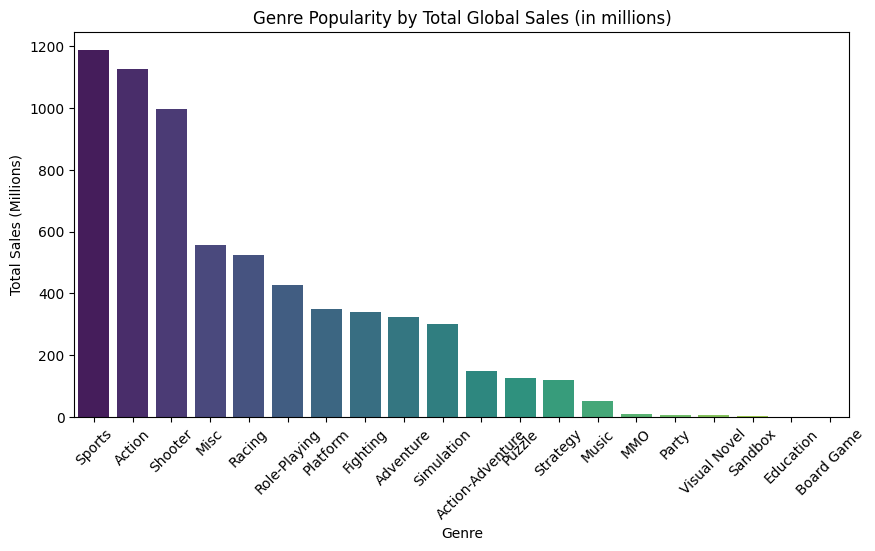

In [ ]:
# Identify which console/platform contributes most to total sales.

print(df.loc[df['total_sales'].idxmax(), 'console'])

# Check which publishers or developers dominate global sales.
print(df.loc[df['total_sales'].idxmax(), 'publisher'])
print(df.loc[df['total_sales'].idxmax(), 'developer'])

genre_sales = df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title("Genre Popularity by Total Global Sales (in millions)")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

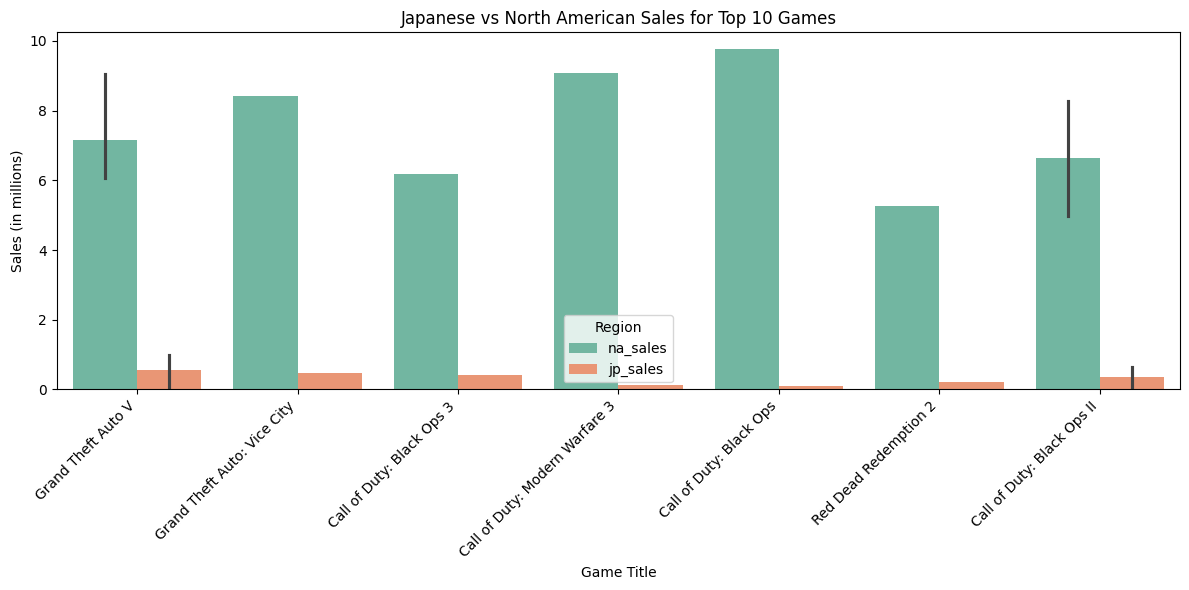

In [ ]:
# How do Japanese sales compare to North American sales for top games?
top_games = df.nlargest(10, 'total_sales')[['title', 'na_sales', 'jp_sales']]

plt.figure(figsize=(12,6))
sns.barplot(data=top_games.melt(id_vars='title',
                                value_vars=['na_sales', 'jp_sales'],
                                var_name='Region',
                                value_name='Sales'),
            x='title', y='Sales', hue='Region', palette='Set2')

plt.title("Japanese vs North American Sales for Top 10 Games")
plt.xlabel("Game Title")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Region")
plt.tight_layout()
plt.show()

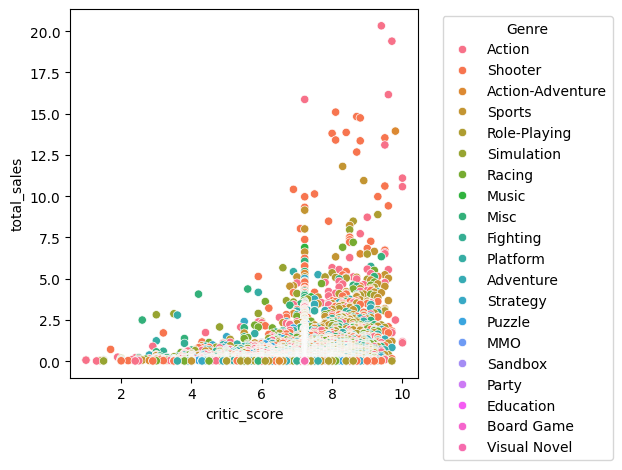

In [ ]:
# Analyze correlation between critic_score and total_sales.
sns.scatterplot(data=df, x="critic_score", y="total_sales", hue="genre")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3403599760.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_avg.head(10).values, y=publisher_avg.head(10).index, palette="crest")


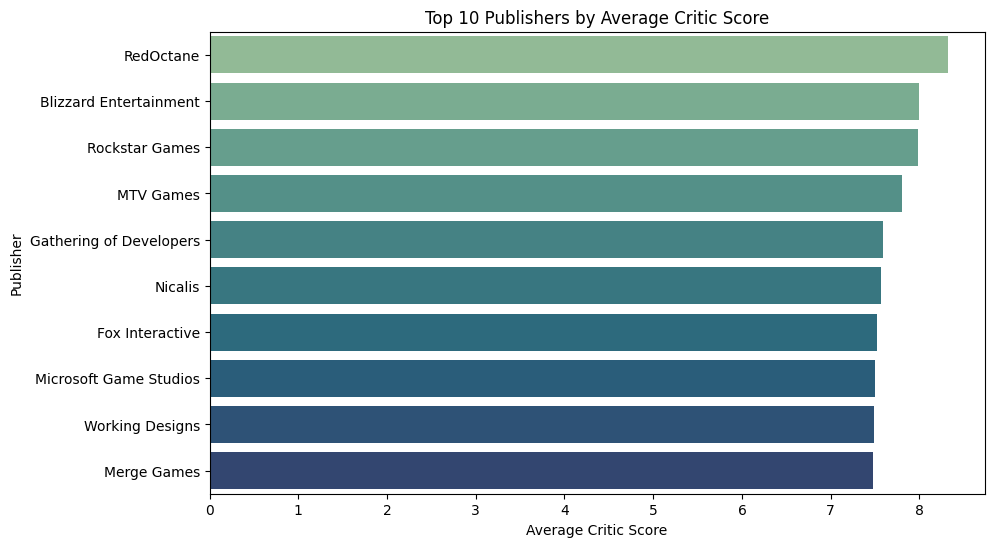

In [ ]:
# Which publishers/developers consistently make highly rated games?
# Is there a strong relationship between critic score and sales?

publisher_counts = df['publisher'].value_counts()
developer_counts = df['developer'].value_counts()

# Keep only publishers/developers with at least 5 games (you can adjust)
top_publishers = df.groupby('publisher').filter(lambda x: len(x) >= 5)
top_developers = df.groupby('developer').filter(lambda x: len(x) >= 5)
publisher_avg = top_publishers.groupby('publisher')['critic_score'].mean().sort_values(ascending=False)
developer_avg = top_developers.groupby('developer')['critic_score'].mean().sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=publisher_avg.head(10).values, y=publisher_avg.head(10).index, palette="crest")
plt.title("Top 10 Publishers by Average Critic Score")
plt.xlabel("Average Critic Score")
plt.ylabel("Publisher")
plt.show()

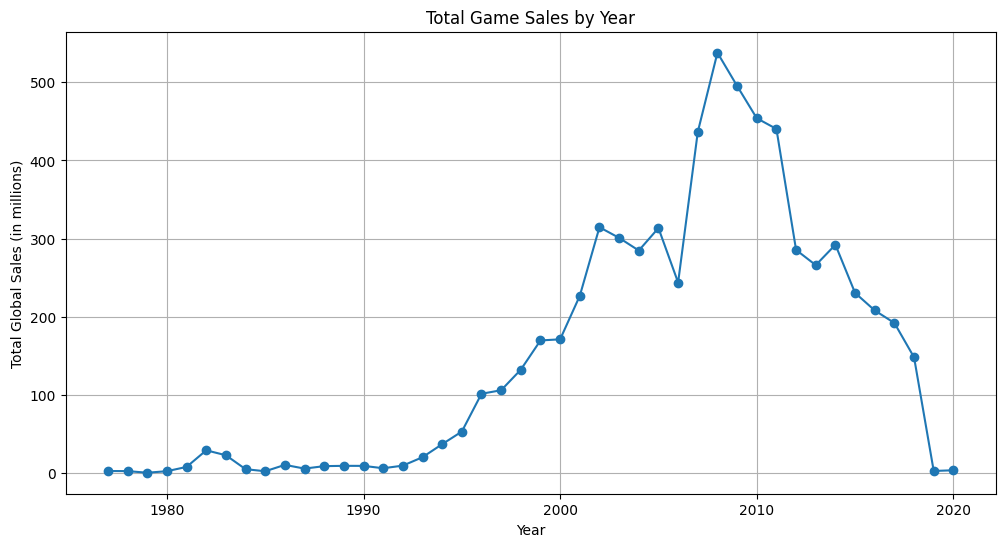

In [ ]:

# Study sales over time — which years saw the most blockbuster releases?
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df['total_sales'] = pd.to_numeric(df['total_sales'], errors='coerce')


sales_per_year = df.groupby('year')['total_sales'].sum().reset_index()
sales_per_year = sales_per_year.sort_values('year')

plt.figure(figsize=(12, 6))
plt.plot(sales_per_year['year'], sales_per_year['total_sales'], marker='o')
plt.title('Total Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.show()

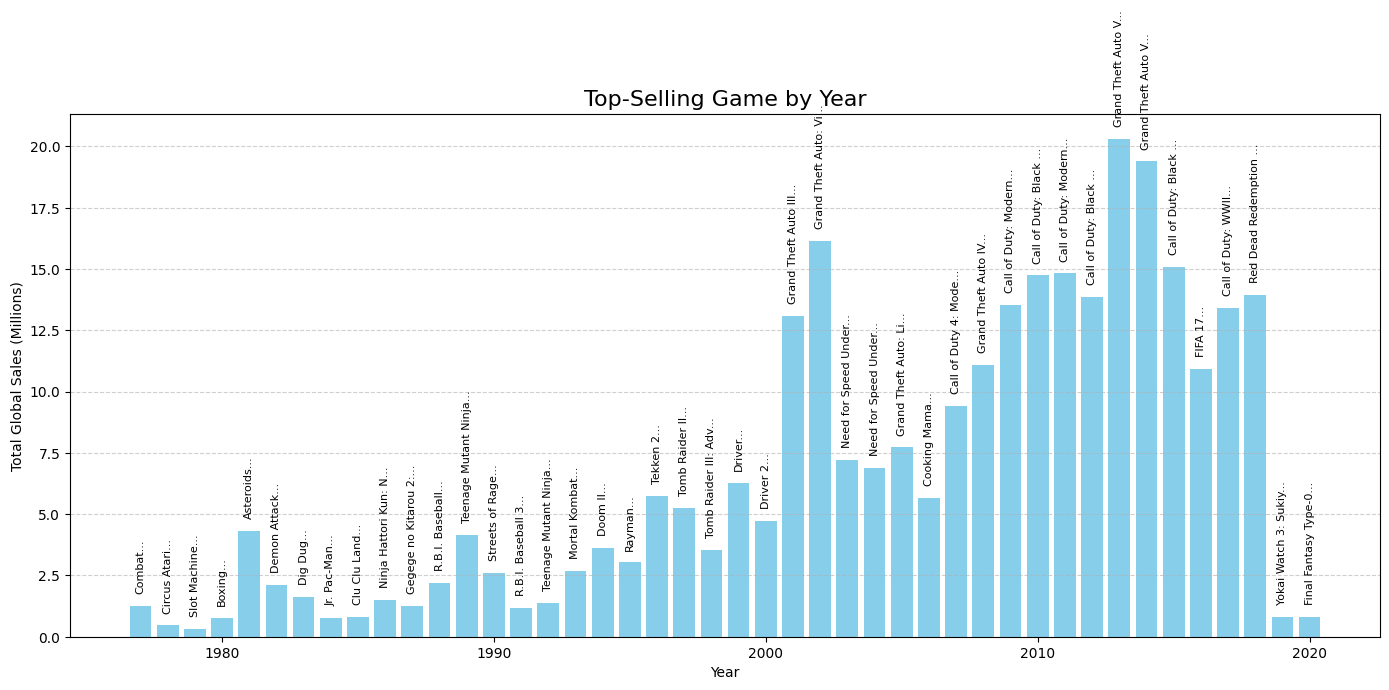

In [ ]:
# Find the top-selling game per year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

top_games = (
    df.loc[df.groupby('year')['total_sales'].idxmax(), ['year', 'title', 'total_sales']]
    .sort_values('year')
)

# --- Plot ---
plt.figure(figsize=(14, 7))
bars = plt.bar(top_games['year'].astype(int), top_games['total_sales'], color='skyblue')

plt.title('Top-Selling Game by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add game names as labels above bars
for bar, name, sales in zip(bars, top_games['title'], top_games['total_sales']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{name[:20]}...",  # truncate long names
        ha='center',
        va='bottom',
        rotation=90,
        fontsize=8
    )

plt.tight_layout()
plt.show()

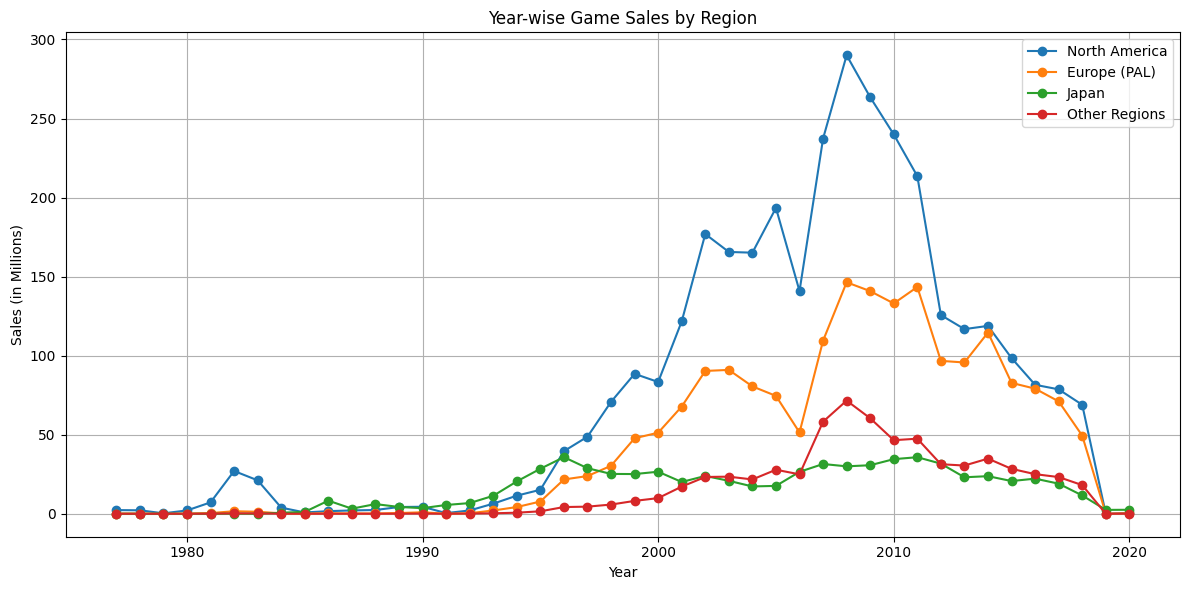

In [ ]:
# Region wise slaes analysis by year.

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Drop rows without year
df = df.dropna(subset=['year'])

# Convert all sales columns to numeric
for col in ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by year and sum each region's sales
yearly_sales = (
    df.groupby('year')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']]
    .sum()
    .reset_index()
    .sort_values('year')
)

plt.figure(figsize=(12, 6))

plt.plot(yearly_sales['year'], yearly_sales['na_sales'], marker='o', label='North America')
plt.plot(yearly_sales['year'], yearly_sales['pal_sales'], marker='o', label='Europe (PAL)')
plt.plot(yearly_sales['year'], yearly_sales['jp_sales'], marker='o', label='Japan')
plt.plot(yearly_sales['year'], yearly_sales['other_sales'], marker='o', label='Other Regions')

plt.title('Year-wise Game Sales by Region')
plt.xlabel('Year')
plt.ylabel('Sales (in Millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


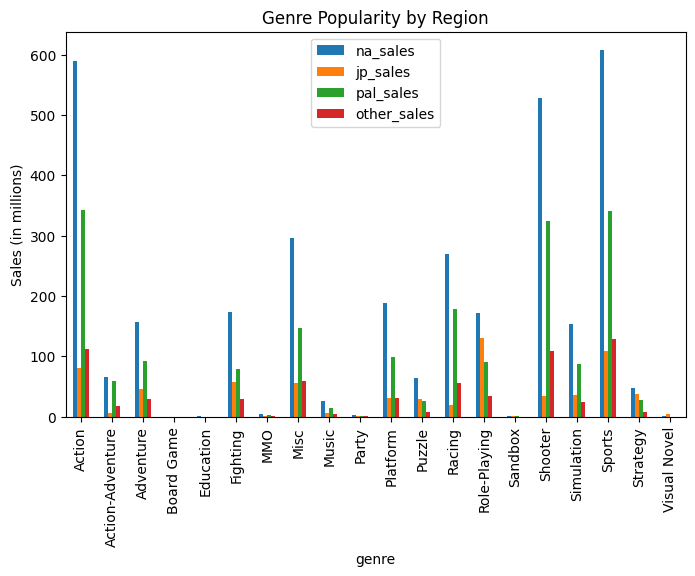

In [ ]:
# Determine which genres  are most successful in each region.

genre_region = df.groupby("genre")[["na_sales", "jp_sales", "pal_sales", "other_sales"]].sum()

genre_region.plot(kind="bar", figsize=(8,5))
plt.title("Genre Popularity by Region")
plt.ylabel("Sales (in millions)")
plt.show()

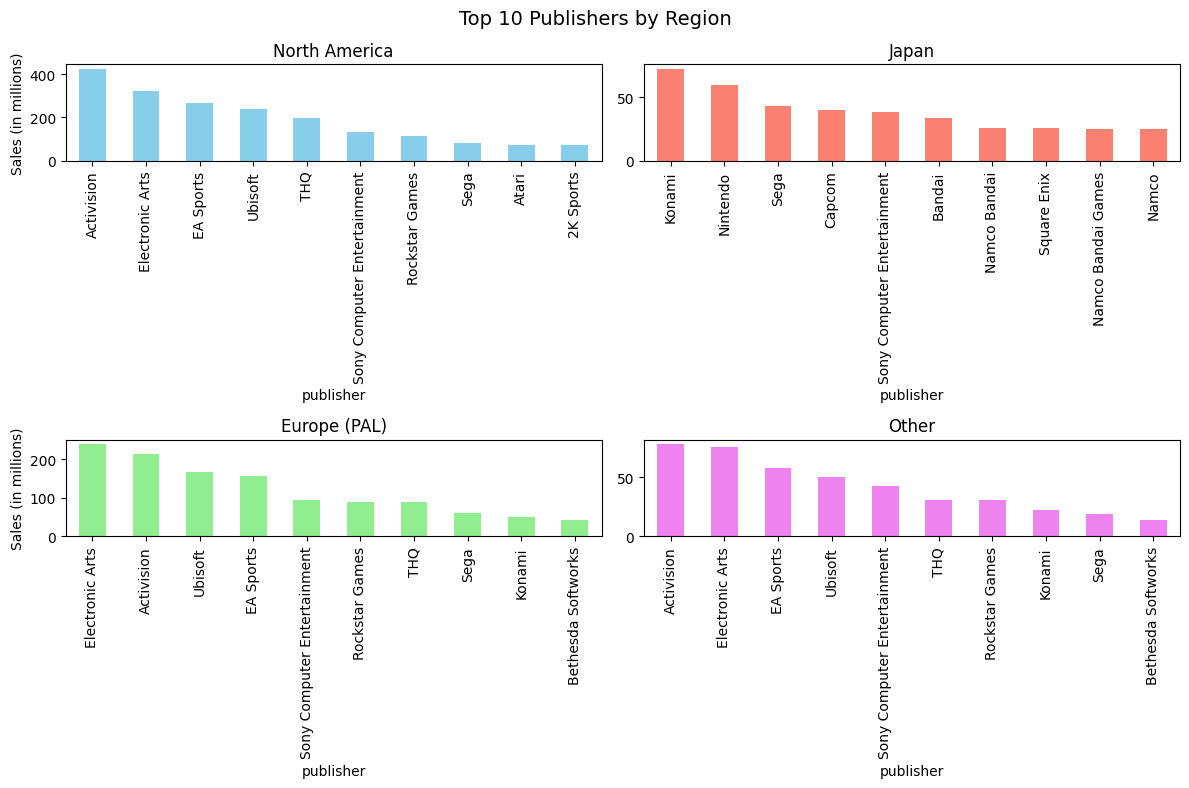

In [ ]:

#  analyzing the top 10 publishers by region gives great insight into which game companies
#  dominate each market (North America, Japan, Europe, etc.).
publisher_region_sales = (
    df.groupby("publisher")[["na_sales", "jp_sales", "pal_sales", "other_sales"]]
    .sum()
    .sort_values(by="na_sales", ascending=False)
)

top_na = publisher_region_sales.nlargest(10, "na_sales")[["na_sales"]]
top_jp = publisher_region_sales.nlargest(10, "jp_sales")[["jp_sales"]]
top_pal = publisher_region_sales.nlargest(10, "pal_sales")[["pal_sales"]]
top_other = publisher_region_sales.nlargest(10, "other_sales")[["other_sales"]]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Top 10 Publishers by Region", fontsize=14)

# North America
top_na.plot(kind="bar", ax=axes[0,0], legend=False, color="skyblue")
axes[0,0].set_title("North America")
axes[0,0].set_ylabel("Sales (in millions)")

# Japan
top_jp.plot(kind="bar", ax=axes[0,1], legend=False, color="salmon")
axes[0,1].set_title("Japan")

# Europe (PAL)
top_pal.plot(kind="bar", ax=axes[1,0], legend=False, color="lightgreen")
axes[1,0].set_title("Europe (PAL)")
axes[1,0].set_ylabel("Sales (in millions)")

# Other
top_other.plot(kind="bar", ax=axes[1,1], legend=False, color="violet")
axes[1,1].set_title("Other")

plt.tight_layout()
plt.show()


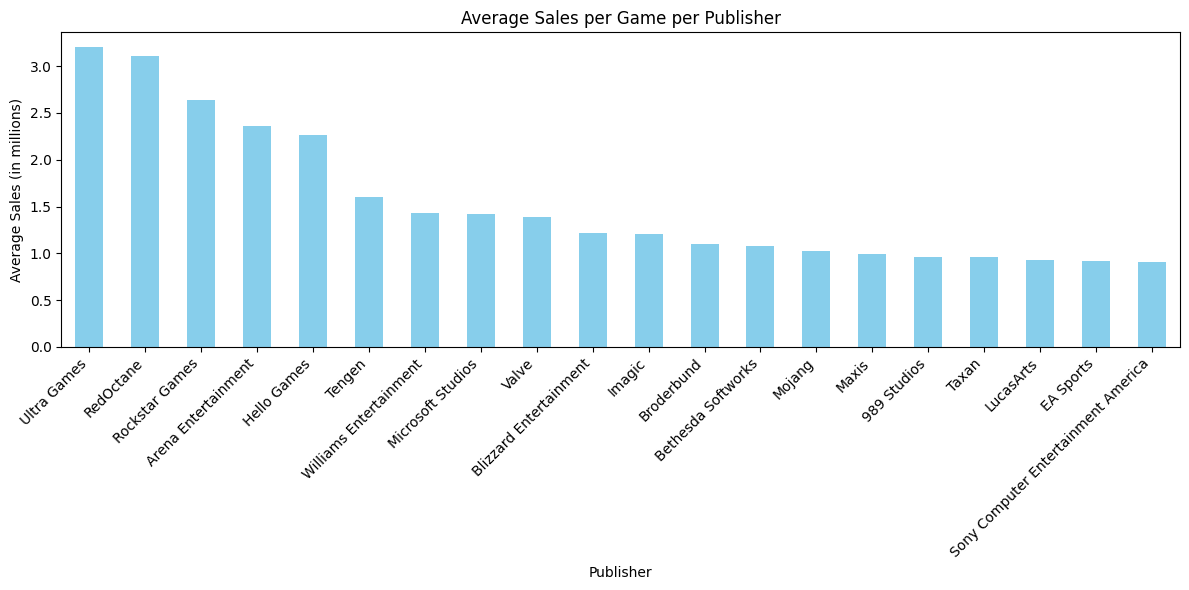

In [ ]:

# Compare average sales per game per publisher.
avg_sales = df.groupby('publisher')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_sales.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Sales per Game per Publisher')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

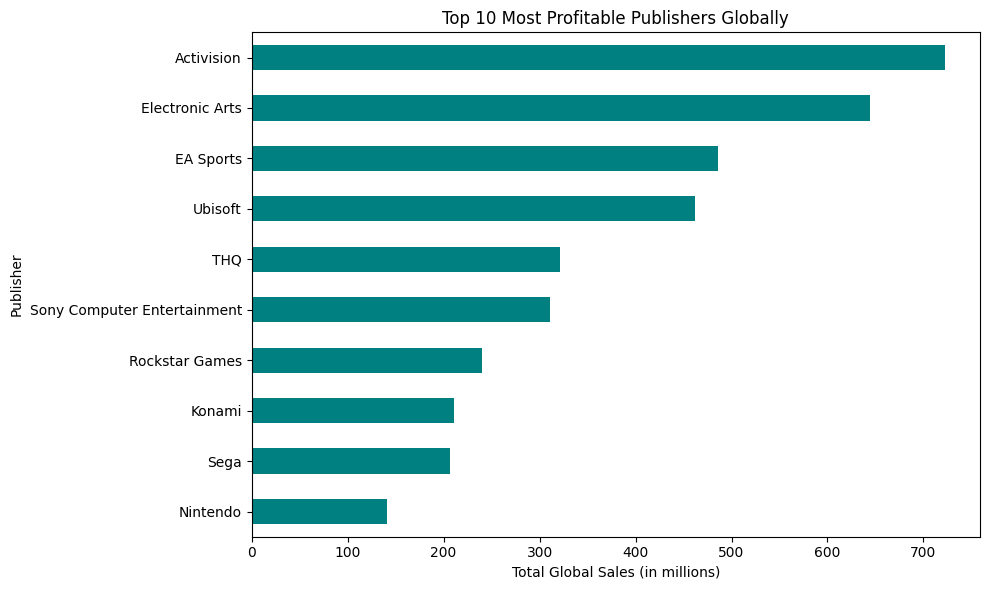

In [ ]:
# Find the most profitable publishers globally.
global_sales = (
    df.groupby('publisher')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
global_sales.head(10).sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Most Profitable Publishers Globally')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

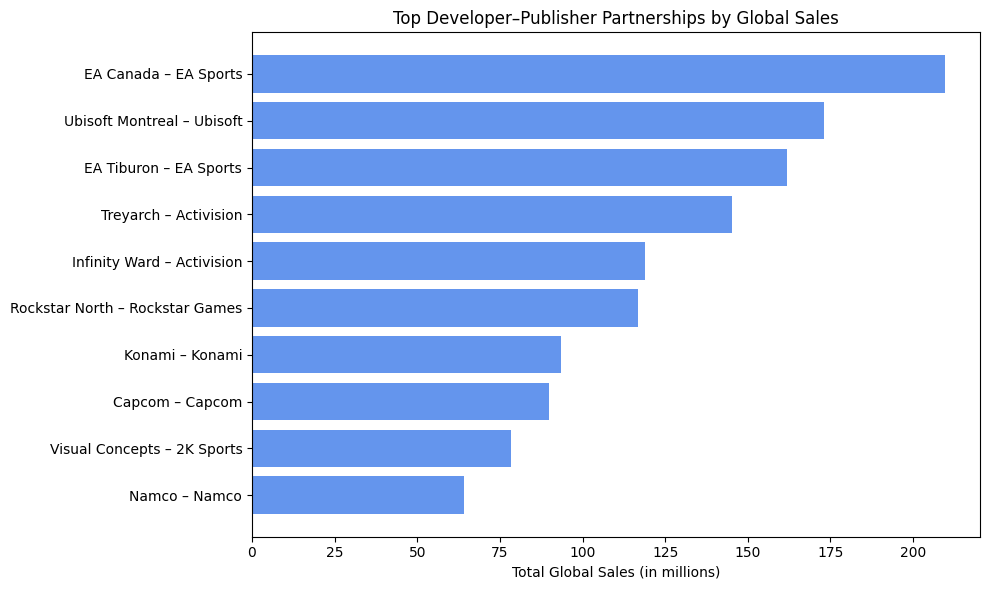

In [ ]:
# Identify developer-publisher partnerships that yield top results.
partnership_sales = (
    df.groupby(['publisher', 'developer'])['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)



plt.figure(figsize=(10,6))
top_partnerships = partnership_sales.head(10)
plt.barh(
    top_partnerships['developer'] + ' – ' + top_partnerships['publisher'],
    top_partnerships['total_sales'],
    color='cornflowerblue'
)
plt.xlabel('Total Global Sales (in millions)')
plt.title('Top Developer–Publisher Partnerships by Global Sales')
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.show()


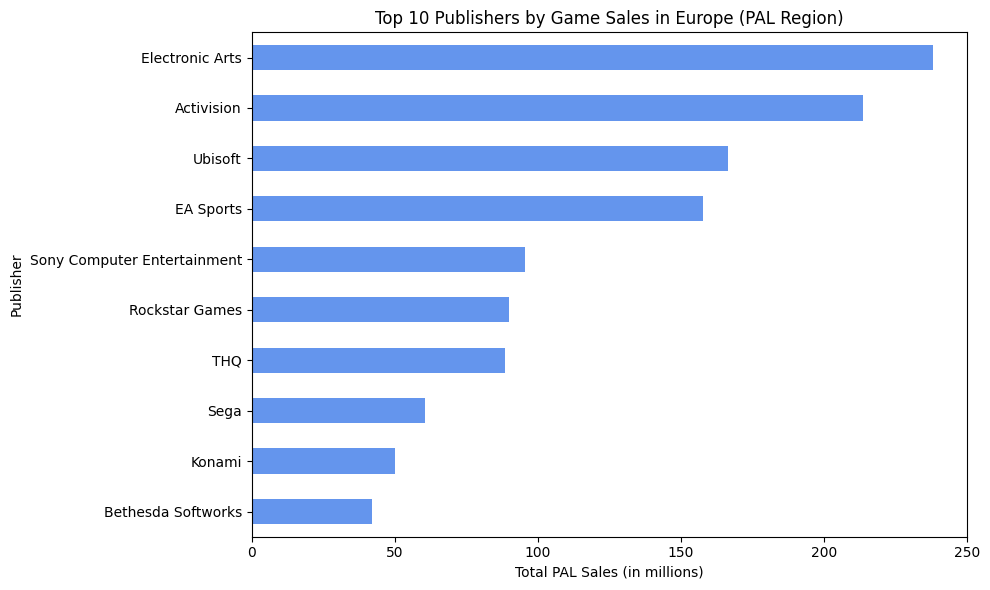

In [ ]:
# Which developer has the highest average critic score?
avg_critic_score = (
    df.groupby('developer')['critic_score']
    .mean()
    .sort_values(ascending=False)
)


# Which publisher’s games perform best in Europe?
pal_sales = (
    df.groupby('publisher')['pal_sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
pal_sales.head(10).sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Publishers by Game Sales in Europe (PAL Region)')
plt.xlabel('Total PAL Sales (in millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

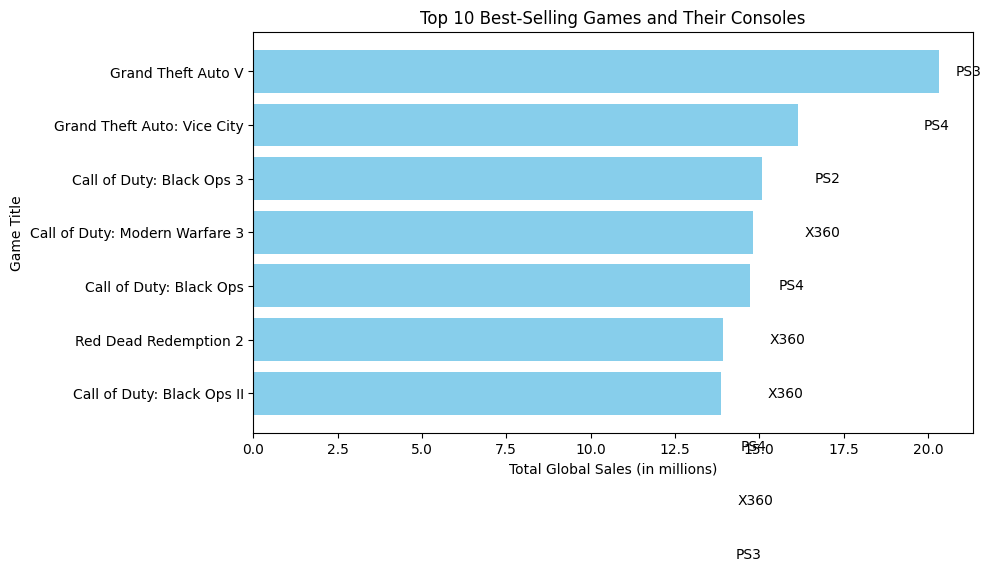

In [ ]:
unique_games = df.drop_duplicates(subset=['title', 'console'])

# Pick top 10 games globally
top10_games = unique_games.nlargest(10, 'total_sales')[['title', 'console', 'total_sales']]


plt.figure(figsize=(10, 6))
plt.barh(top10_games['title'], top10_games['total_sales'], color='skyblue')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Game Title')
plt.title('Top 10 Best-Selling Games and Their Consoles')

# Add console names as text labels beside bars
for i, (sales, console) in enumerate(zip(top10_games['total_sales'], top10_games['console'])):
    plt.text(sales + 0.5, i, console, va='center')

plt.gca().invert_yaxis()  # top game on top
plt.tight_layout()
plt.show()

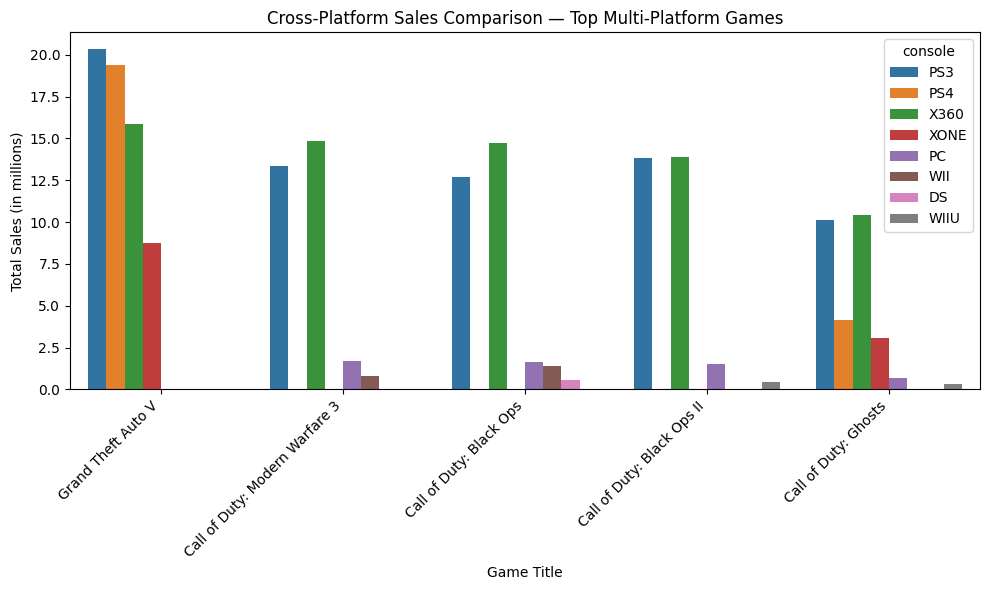

In [ ]:

# How do sales of the same title differ across platforms?
unique_games = df.drop_duplicates(subset=['title', 'console'])

multi_platform = unique_games['title'].value_counts()
multi_platform_titles = multi_platform[multi_platform > 1].index

multi_platform_df = unique_games[unique_games['title'].isin(multi_platform_titles)]

top_multi_titles = multi_platform_df.groupby('title')['total_sales'].sum().nlargest(5).index

filtered = multi_platform_df[multi_platform_df['title'].isin(top_multi_titles)]

plt.figure(figsize=(10,6))
sns.barplot(data=filtered, x='title', y='total_sales', hue='console')
plt.title('Cross-Platform Sales Comparison — Top Multi-Platform Games')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Game Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

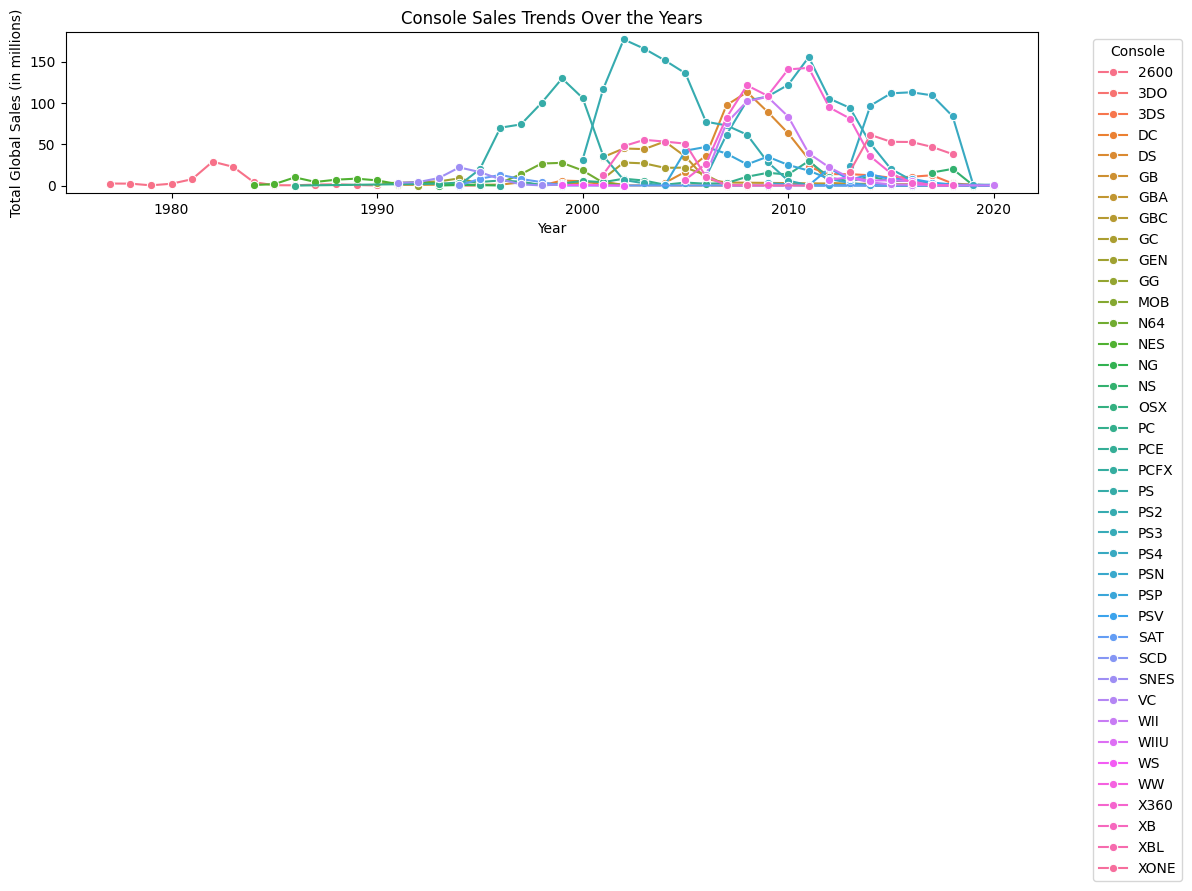

In [ ]:

# Which consoles have the longest-lasting sales trends?

df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

sales_trend = (
    df.groupby(['console', 'year'])['total_sales']
    .sum()
    .reset_index()
    .dropna()
)

sales_trend.head()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trend, x='year', y='total_sales', hue='console', marker='o')
plt.title('Console Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.legend(title='Console', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

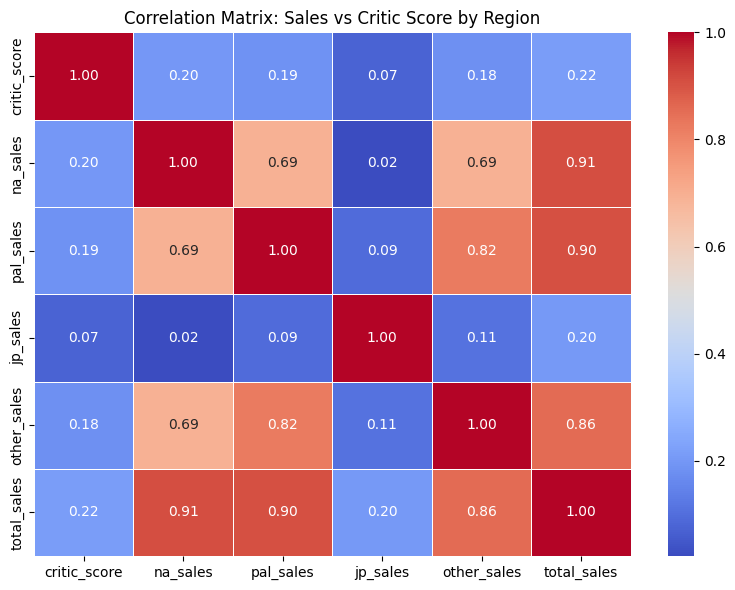

In [ ]:
# Correlation matrix of sales and critic_score by region.
cols = ['critic_score', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']

corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Sales vs Critic Score by Region")
plt.tight_layout()
plt.show()
